In [63]:
'''

Setup Info 

conda create -n news_stock  python=3.7 anaconda
activate news_stock
pip install xgboost



Data Info :

Added sentiment values to csv using  jupyter notebook
Extracting the sentiment values for the news headlines and saving to CSV File

Added start trend by comparing current days opening value with previous days adjecent close value

combined with sentiment.csv


Credits :   

Sun, J. (2016, August). Daily News for Stock Market Prediction, Version 1. 
Retrieved 03/25/2019  from https://www.kaggle.com/aaron7sun/stocknews

https://www.kaggle.com/lseiyjg/use-news-to-predict-stock-markets

http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html


'''



In [2]:
#Importing all the modules need 
import nltk
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
#CSV created through program
data = pd.read_csv("combined with sentiment.csv")

In [65]:
data.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8',
       ...
       'Top23 neutral', 'Top23 negative', 'Top24 CompoundValue',
       'Top24 positive', 'Top24 neutral', 'Top24 negative',
       'Top25 CompoundValue', 'Top25 positive', 'Top25 neutral',
       'Top25 negative'],
      dtype='object', length=128)

In [66]:
data.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23 neutral,Top23 negative,Top24 CompoundValue,Top24 positive,Top24 neutral,Top24 negative,Top25 CompoundValue,Top25 positive,Top25 neutral,Top25 negative
0,8/8/2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,0.860,0.140,-0.8519,0.000,0.350,0.650,0.4019,0.351,0.649,0.0
1,8/11/2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,0.753,0.247,-0.1832,0.263,0.414,0.323,0.0000,0.000,1.000,0.0


In [124]:

#CSV from kaggle
news = pd.read_csv('Combined_News_DJIA.csv')

In [135]:

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bibin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [136]:
from nltk.tokenize import sent_tokenize, word_tokenize
# Create a single string for each date (since we only want to look at word counts)
combined_news = ''
for row in range(0,len(news.index)):
    combined_news+=' '.join(str(x).lower().strip() for x in news.iloc[row,2:27])
vectorizer = CountVectorizer()
news_vect = vectorizer.build_tokenizer()(combined_news)
word_counts = pd.DataFrame([[x,news_vect.count(x)] for x in set(news_vect)], columns = ['Word', 'Count'])


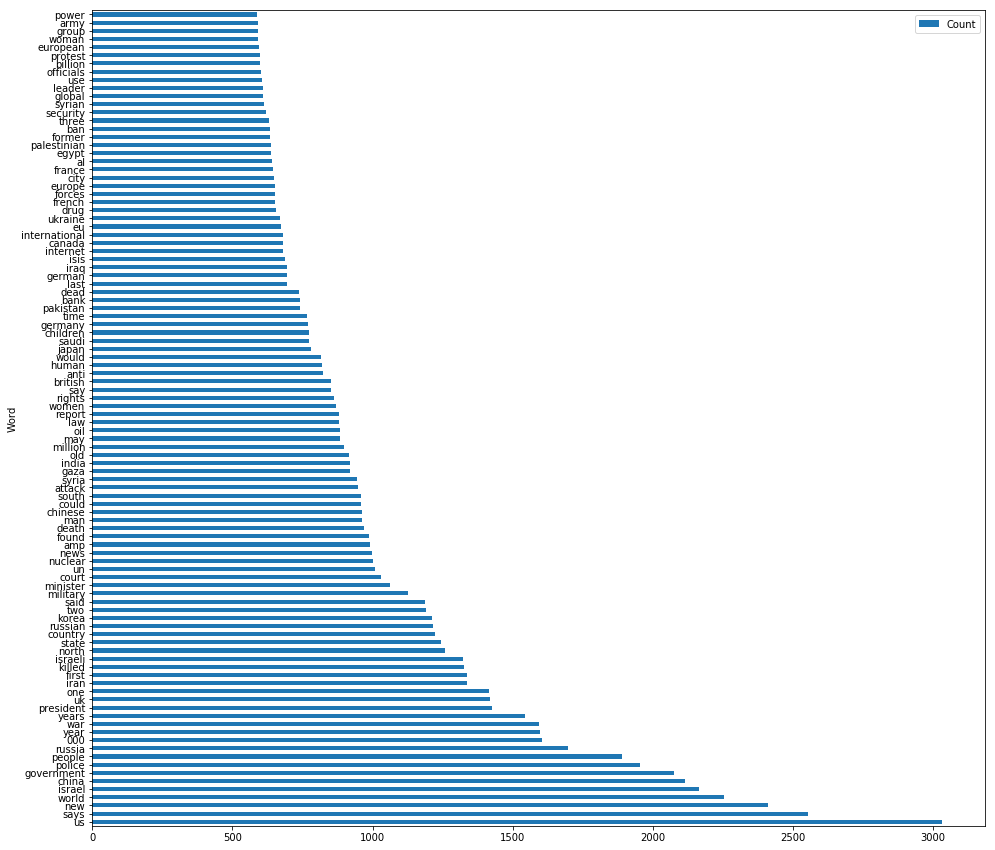

In [137]:
word_counts_adj = word_counts
word_counts_adj = word_counts_adj.reset_index(drop=True)

for i in word_counts['Word']:
    if i in stop:
        word_counts_adj = word_counts_adj.drop(word_counts_adj[word_counts_adj['Word'] == i].index)
        
word_counts_adj.index = word_counts_adj['Word']
counts = word_counts_adj.sort_values(by='Count', ascending=False)[0:100].plot(kind='barh', figsize = (16,15))
plt.show()

1591


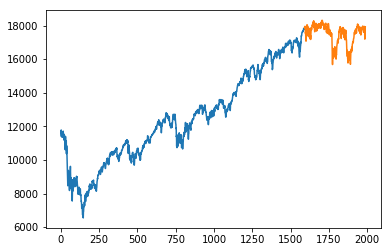

In [139]:
#Below plot shows the opening price split up into the respective train and test sets.

stock = pd.read_csv("DJIA_table_with_start.csv")
train_size = int(len(stock.index) * 0.8)

print(train_size)
train = stock.iloc[:train_size]
test = stock.iloc[train_size:]

plt.plot(train['Open'])
plt.plot([None for i in train['Open']] + [x for x in test['Open']])

In [105]:
#Columns added using sentiment alaysis

columns_to_predict_1=['Top1 CompoundValue']
columns_to_predict_2=['Top1 CompoundValue', 'Top2 CompoundValue','Top3 CompoundValue']


CompoundValue_to_predict_3=['Top1 CompoundValue', 'Top2 CompoundValue', 'Top3 CompoundValue',
                      'Top4 CompoundValue', 'Top5 CompoundValue','Top6 CompoundValue', 'Top7 CompoundValue',
                      'Top8 CompoundValue', 'Top9 CompoundValue','Top10 CompoundValue', 'Top11 CompoundValue',
                      'Top12 CompoundValue', 'Top13 CompoundValue','Top14 CompoundValue', 'Top15 CompoundValue',
                     'Top16 CompoundValue', 'Top17 CompoundValue','Top18 CompoundValue', 'Top19 CompoundValue',
                      'Top20 CompoundValue', 'Top21 CompoundValue','Top22 CompoundValue', 'Top23 CompoundValue',
                      'Top24 CompoundValue', 'Top25 CompoundValue']

positive_to_predict_3=['Top1 positive', 'Top2 positive','Top3 positive',
                      'Top4 positive', 'Top5 positive','Top6 positive', 'Top7 positive',
                      'Top8 positive', 'Top9 positive','Top10 positive', 'Top11 positive',
                      'Top12 positive', 'Top13 positive','Top14 positive', 'Top15 positive',
                     'Top16 positive', 'Top17 positive','Top18 positive', 'Top19 positive',
                      'Top20 positive', 'Top21 positive','Top22 positive', 'Top23 positive',
                      'Top24 positive', 'Top25 positive']

negative_to_predict_3=['Top1 negative', 'Top2 negative','Top3 negative', 
                      'Top4 negative', 'Top5 negative','Top6 negative', 'Top7 negative',
                      'Top8 negative', 'Top9 negative','Top10 negative', 'Top11 negative',
                      'Top12 negative', 'Top13 negative','Top14 negative', 'Top15 negative',
                     'Top16 negative', 'Top17 negative','Top18 negative', 'Top19 negative',
                      'Top20 negative', 'Top21 negative','Top22 negative', 'Top23 negative',
                      'Top24 negative', 'Top25 negative']

In [119]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier, SGDRegressor,LogisticRegression
def models(data_to_model,train,test):
    num_folds = 10
    scoring = 'accuracy'
    # Append the models to the models list
    models = []
    models.append(('LR' , LogisticRegression(solver='lbfgs')))
   
    models.append(('KNN' , KNeighborsClassifier()))
    models.append(('Decision TreeClassifier' , DecisionTreeClassifier()))
    models.append(('Gaussian Naive Bayes' , GaussianNB()))
    models.append(('SVM' , SVC(gamma='auto')))
    models.append(('Random Forest' , RandomForestClassifier(n_estimators=50)))
    models.append(('XGBoost',XGBClassifier()))
    '''models.append(('XGBoost after tuning ',XGBClassifier(
     learning_rate =0.1,
     n_estimators=1000,
     max_depth=5,
     min_child_weight=1,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=25)))'''
    for name, model in models:
        clf = model
        clf.fit(train[data_to_model], train["Label"])
        y_pred = clf.predict(test[data_to_model])
        accu_score = accuracy_score(test["Label"], y_pred)
        print(name,accu_score*100)


In [120]:
train[data_to_model].columns

Index(['Top1 negative', 'Top2 negative', 'Top3 negative', 'Top4 negative',
       'Top5 negative', 'Top6 negative', 'Top7 negative', 'Top8 negative',
       'Top9 negative', 'Top10 negative', 'Top11 negative', 'Top12 negative',
       'Top13 negative', 'Top14 negative', 'Top15 negative', 'Top16 negative',
       'Top17 negative', 'Top18 negative', 'Top19 negative', 'Top20 negative',
       'Top21 negative', 'Top22 negative', 'Top23 negative', 'Top24 negative',
       'Top25 negative', 'start_trend'],
      dtype='object')

Taking data from  2008-08-08 to 2014-12-31 as train and
2015-01-01 to 2016-07-01 as test

In [121]:
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']
print("Accuracy with sentiment")
data_to_model=CompoundValue_to_predict_3
models(data_to_model,train,test)
data_to_model=data_to_model+['start_trend']
data_to_model
print("\n\nAccuracy with start trend and sentiment")
models(data_to_model,train,test)

Accuracy with sentiment
LR 51.20068610634648
KNN 50.17152658662093
Decision TreeClassifier 48.54202401372213
Gaussian Naive Bayes 50.08576329331046
SVM 53.087478559176674
Random Forest 51.45797598627787
XGBoost 51.02915951972555


Accuracy with start trend and sentiment
LR 59.86277873070326
KNN 53.00171526586621
Decision TreeClassifier 52.05831903945112
Gaussian Naive Bayes 61.492281303602056
SVM 62.17838765008577
Random Forest 56.68953687821612
XGBoost 57.20411663807891


Taking 80% of data as train and 20% as test

In [122]:
train_size = int(len(data.index) * 0.8)

print(train_size)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

print("Accuracy with sentiment")
data_to_model=CompoundValue_to_predict_3
models(data_to_model,train,test)
data_to_model=data_to_model+['start_trend']
data_to_model
print("\n\nAccuracy with start trend and sentiment")
models(data_to_model,train,test)

1591
Accuracy with sentiment
LR 50.0
KNN 46.984924623115575
Decision TreeClassifier 50.753768844221106
Gaussian Naive Bayes 51.256281407035175
SVM 50.753768844221106
Random Forest 46.984924623115575
XGBoost 48.49246231155779


Accuracy with start trend and sentiment
LR 63.31658291457286
KNN 57.03517587939698
Decision TreeClassifier 54.52261306532663
Gaussian Naive Bayes 61.80904522613066
SVM 66.33165829145729
Random Forest 57.78894472361809
XGBoost 62.311557788944725


Creating model using positive sentiments only

In [117]:
train_size = int(len(data.index) * 0.8)

print(train_size)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

print("Accuracy with sentiment")
data_to_model=positive_to_predict_3
models(data_to_model,train,test)
data_to_model=data_to_model+['start_trend']
data_to_model
print("\n\nAccuracy with start trend and sentiment")
models(data_to_model,train,test)

1591
Accuracy with sentiment
LR 0.5125628140703518
KNN 0.49748743718592964
Decision TreeClassifier 0.49748743718592964
Gaussian Naive Bayes 0.457286432160804
SVM 0.507537688442211
Random Forest 0.4849246231155779
XGBoost 0.46984924623115576


Accuracy with start trend and sentiment
LR 0.6457286432160804
KNN 0.5703517587939698
Decision TreeClassifier 0.5552763819095478
Gaussian Naive Bayes 0.5753768844221105
SVM 0.6633165829145728
Random Forest 0.6105527638190955
XGBoost 0.6105527638190955


In [118]:
train_size = int(len(data.index) * 0.8)

print(train_size)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

print("Accuracy with sentiment")
data_to_model=negative_to_predict_3
models(data_to_model,train,test)
data_to_model=data_to_model+['start_trend']
data_to_model
print("\n\nAccuracy with start trend and sentiment")
models(data_to_model,train,test)

1591
Accuracy with sentiment
LR 0.4849246231155779
KNN 0.49246231155778897
Decision TreeClassifier 0.4949748743718593
Gaussian Naive Bayes 0.4949748743718593
SVM 0.507537688442211
Random Forest 0.45226130653266333
XGBoost 0.5025125628140703


Accuracy with start trend and sentiment
LR 0.6155778894472361
KNN 0.5628140703517588
Decision TreeClassifier 0.5477386934673367
Gaussian Naive Bayes 0.6256281407035176
SVM 0.6633165829145728
Random Forest 0.5979899497487438
XGBoost 0.5804020100502513


Building test set and train set as 80% train ,20% test and 6 year train , 2 year test  

In [3]:
data = pd.read_csv(r'C:/usf/Data Science Programming/project/Combined_News_DJIA_with_start.csv')
train1 = data[data['Date'] < '2015-01-01']
test1 = data[data['Date'] > '2014-12-31']
train_size = int(len(data.index) * 0.8)
train2 = data.iloc[:train_size]
test2 = data.iloc[train_size:]

#Predicting the stock movement using term frequency–inverse document frequency of news and logistic regression

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from scipy import sparse
from scipy.sparse import issparse
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
trainheadlines = []
for row in range(0,len(train1.index)):
    trainheadlines.append(' '.join(str(x) for x in train1.iloc[row,2:27]))
advancedvectorizer = TfidfVectorizer( min_df=0.0039, max_df=0.1, max_features = 200000, ngram_range = (3, 3))
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)
advancedtrain=sparse.hstack((advancedtrain,np.array(train1["start_trend"])[:,None]))
advancedmodel = LogisticRegression(solver='lbfgs')
advancedmodel = advancedmodel.fit(advancedtrain, train1["Label"])
testheadlines = []
for row in range(0,len(test1.index)):
    testheadlines.append(' '.join(str(x) for x in test1.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
advancedtest=sparse.hstack((advancedtest,np.array(test1["start_trend"])[:,None]))

preds = advancedmodel.predict(advancedtest)
acc = accuracy_score(test1['Label'], preds)
print('Logic Regression  accuracy: ', acc*100)

Logic Regression  accuracy:  60.891938250428815


In [18]:
trainheadlines = []
for row in range(0,len(train2.index)):
    trainheadlines.append(' '.join(str(x) for x in train2.iloc[row,2:27]))
advancedvectorizer = TfidfVectorizer( min_df=0.0039, max_df=0.1, max_features = 200000, ngram_range = (3, 3))
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)
advancedtrain=sparse.hstack((advancedtrain,np.array(train2["start_trend"])[:,None]))
advancedmodel = LogisticRegression(solver='lbfgs')
advancedmodel = advancedmodel.fit(advancedtrain, train2["Label"])
testheadlines = []
for row in range(0,len(test2.index)):
    testheadlines.append(' '.join(str(x) for x in test2.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
advancedtest=sparse.hstack((advancedtest,np.array(test2["start_trend"])[:,None]))

preds = advancedmodel.predict(advancedtest)
acc = accuracy_score(test2['Label'], preds)
print('Logic Regression  accuracy: ', acc*100)

Logic Regression  accuracy:  65.82914572864321
